In [328]:
import pandas as pd

from googleapiclient.discovery import build
from IPython.display import JSON

from config import Youtube_API_Key
#from api_methods import get_channel_stats, get_video_ids

import seaborn as sns
import matplotlib.pyplot as plt

In [329]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=Youtube_API_Key)

Chanel id converter : https://www.streamweasels.com/tools/youtube-channel-id-and-user-id-convertor/

Youtube TR Most Popular Videos Analysis

In [330]:
request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        maxResults=10,
        regionCode="TR"
    )
response = request.execute()
print(response)
   

{'kind': 'youtube#videoListResponse', 'etag': 'HC9H9N09z5gKgRlwrVFR4W9kP-0', 'items': [{'kind': 'youtube#video', 'etag': 'bI7Gc9brB9zhWTU0rLCpaGi7glU', 'id': '_LVk6qMiF5U', 'snippet': {'publishedAt': '2023-12-27T21:01:41Z', 'channelId': 'UCbfcZal6XtsXRpGVtrXCX4Q', 'title': 'Sandık Kokusu 4.Bölüm @sandikkokusudizi', 'description': 'Sandık Kokusu 4.Bölüm Özeti; Baskında eli yaralanan Atilla, eve dönerken Karsu ile karşılaşır. Köpek ısırdı dese de Karsu’nun içi rahat etmez ve birlikte hastaneye giderler. Bu olay ikiliyi yakınlaştırır. \nKarsu çocukları okula yazdırır ve okul için alışveriş yapar. Ancak masraflar düşündüğünden fazla tutar. \nUcuz estetikçiye giden Filiz, alerji olur. Karsu onu apar topar hastaneye götürür. Bir de hastaneye borçlanırlar. Karsu, evdekilere çalışacağını açıklar. \nOzan İstanbul’a gelir ve birlikte tekneyle gezerler. \nFiliz, gece yürüyüşünde baskından dönen siyahlar içindeki Atilla’yı görür ve hırsız sanar. Atilla, Deniz’in yardımıyla Filiz’lerin evine girer 

Json code converter :

- https://www.objgen.com/json/local/rh49EaBVJ
- https://jsonformatter.org/json-editor

Videos Like According to the views

In [331]:
#For first row at TR popular videos
statistics = response["items"][0]['statistics']
statistics


{'viewCount': '1012414',
 'likeCount': '11666',
 'favoriteCount': '0',
 'commentCount': '1138'}

Method for Fuction

In [332]:
def get_most_pop_Youtube_TR(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers.google.com/youtube/v3/docs/channels/list#usage you can look detailly.
    
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        regionCode="TR",
    )
    response = request.execute()


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'channelName': item['snippet']['title'],
                'PublishTime': item['snippet']['publishedAt'],
                'views': item['statistics']['viewCount'],
                'LikeCount':item['statistics']['likeCount'],
                'CommentCount':item['statistics']['commentCount'],
                'Duration': item['contentDetails']['duration'],
                'videoID': item['id']
        }
        all_data.append(data)

    return pd.DataFrame(all_data)

In [333]:
TR_Youtube_Most_Pop=get_most_pop_Youtube_TR(youtube)

In [334]:
TR_Youtube_Most_Pop.head()

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1012414,11666,1138,PT2H14M6S,_LVk6qMiF5U
1,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2695554,33386,4857,PT2H4M12S,5nXRi1dkRps
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,713326,36597,2114,PT28M,aWaJSJmsy3c
3,Hudutsuz Sevda 14. Bölüm 1. Fragmanı | Seninle...,2023-12-25T16:07:54Z,1595626,29731,1443,PT42S,aysE7ClWANA
4,Berke Can Kabataş en yeni TikTok videoları #Sh...,2023-12-27T13:22:25Z,255843,10543,62,PT47S,rRDknVsE-SU


In [335]:
TR_Youtube_Most_Pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channelName   5 non-null      object
 1   PublishTime   5 non-null      object
 2   views         5 non-null      object
 3   LikeCount     5 non-null      object
 4   CommentCount  5 non-null      object
 5   Duration      5 non-null      object
 6   videoID       5 non-null      object
dtypes: object(7)
memory usage: 408.0+ bytes


In [336]:
#Turn object value types to numeric by pandas
TR_Youtube_Most_Pop[['views', 'LikeCount','CommentCount']] = TR_Youtube_Most_Pop[['views', 'LikeCount','CommentCount']].apply(pd.to_numeric, errors='coerce')
# The errors='coerce' argument is used to handle non-convertible values by replacing them with NaN.We dont have but ı put for an example

In [337]:
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1012414,11666,1138,PT2H14M6S,_LVk6qMiF5U
1,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2695554,33386,4857,PT2H4M12S,5nXRi1dkRps
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,713326,36597,2114,PT28M,aWaJSJmsy3c
3,Hudutsuz Sevda 14. Bölüm 1. Fragmanı | Seninle...,2023-12-25T16:07:54Z,1595626,29731,1443,PT42S,aysE7ClWANA
4,Berke Can Kabataş en yeni TikTok videoları #Sh...,2023-12-27T13:22:25Z,255843,10543,62,PT47S,rRDknVsE-SU


In [338]:
#Sort values according to the views, because of numeric value we finished clearly. Careful :)
TR_Youtube_Most_Pop.sort_values(by=['views'], ascending=False,inplace=True)
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
1,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2695554,33386,4857,PT2H4M12S,5nXRi1dkRps
3,Hudutsuz Sevda 14. Bölüm 1. Fragmanı | Seninle...,2023-12-25T16:07:54Z,1595626,29731,1443,PT42S,aysE7ClWANA
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1012414,11666,1138,PT2H14M6S,_LVk6qMiF5U
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,713326,36597,2114,PT28M,aWaJSJmsy3c
4,Berke Can Kabataş en yeni TikTok videoları #Sh...,2023-12-27T13:22:25Z,255843,10543,62,PT47S,rRDknVsE-SU


In [339]:
# Define a function to limit the number of characters for channelname limitation
def limit_characters(channelName, max_length=25):
    return channelName[:max_length] 


In [340]:
# Apply the function to the 'text' column
TR_Youtube_Most_Pop['channelName'] = TR_Youtube_Most_Pop['channelName'].apply(limit_characters)

# Display the updated DataFrame
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
1,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2695554,33386,4857,PT2H4M12S,5nXRi1dkRps
3,Hudutsuz Sevda 14. Bölüm,2023-12-25T16:07:54Z,1595626,29731,1443,PT42S,aysE7ClWANA
0,Sandık Kokusu 4.Bölüm @sa,2023-12-27T21:01:41Z,1012414,11666,1138,PT2H14M6S,_LVk6qMiF5U
2,Neden Ayrıldık? Nasıl Bar,2023-12-27T15:29:18Z,713326,36597,2114,PT28M,aWaJSJmsy3c
4,Berke Can Kabataş en yeni,2023-12-27T13:22:25Z,255843,10543,62,PT47S,rRDknVsE-SU


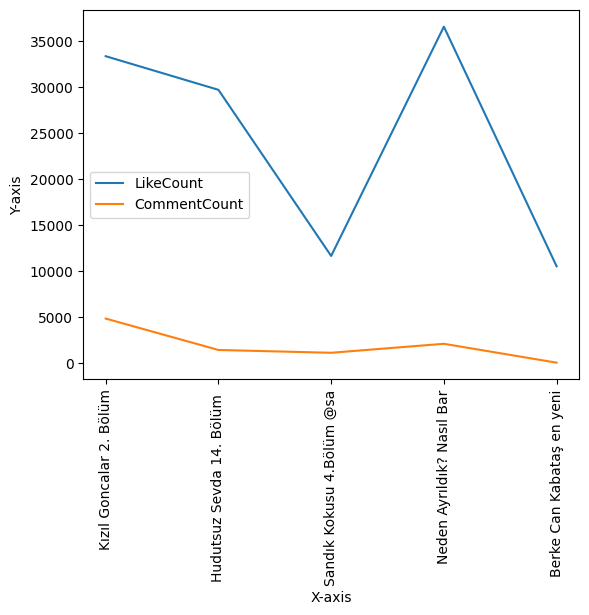

In [341]:

# Create a line plot with three lines
plt.plot(TR_Youtube_Most_Pop['channelName'], TR_Youtube_Most_Pop['LikeCount'], label='LikeCount')
plt.plot(TR_Youtube_Most_Pop['channelName'], TR_Youtube_Most_Pop['CommentCount'], label='CommentCount')


# Add labels and a legend

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
# Show the plot
plt.show()


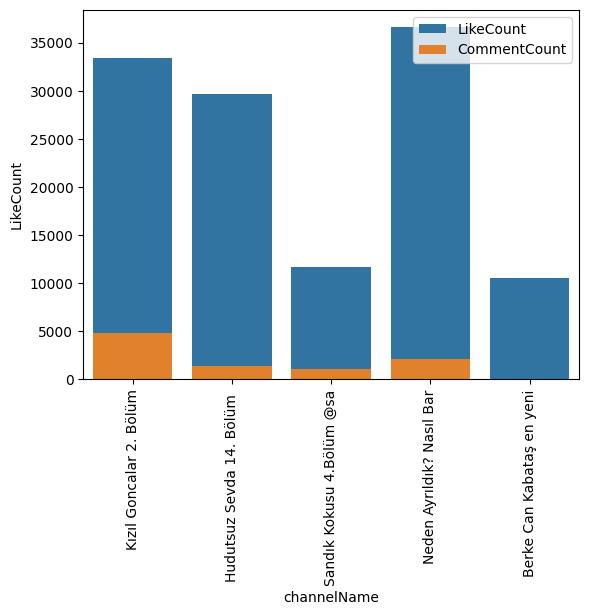

In [342]:
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="LikeCount",label="LikeCount")
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="CommentCount",label="CommentCount")
plt.legend(loc='best') # to see legend
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
# Show the plot
plt.show()

#Output: As you see, in movies views are higher than classic short videos but like count is almost equal to major view channelname.

In [343]:
TR_Youtube_Most_Pop.insert(2,'LikeC/Views',TR_Youtube_Most_Pop['LikeCount'].astype(int) / TR_Youtube_Most_Pop['views'].astype(int))


In [344]:
TR_Youtube_Most_Pop.sort_values(by=['LikeC/Views'])

,channelName,PublishTime,LikeC/Views,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sa,2023-12-27T21:01:41Z,0.011523,1012414,11666,1138,PT2H14M6S,_LVk6qMiF5U
1,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,0.012386,2695554,33386,4857,PT2H4M12S,5nXRi1dkRps
3,Hudutsuz Sevda 14. Bölüm,2023-12-25T16:07:54Z,0.018633,1595626,29731,1443,PT42S,aysE7ClWANA
4,Berke Can Kabataş en yeni,2023-12-27T13:22:25Z,0.041209,255843,10543,62,PT47S,rRDknVsE-SU
2,Neden Ayrıldık? Nasıl Bar,2023-12-27T15:29:18Z,0.051305,713326,36597,2114,PT28M,aWaJSJmsy3c


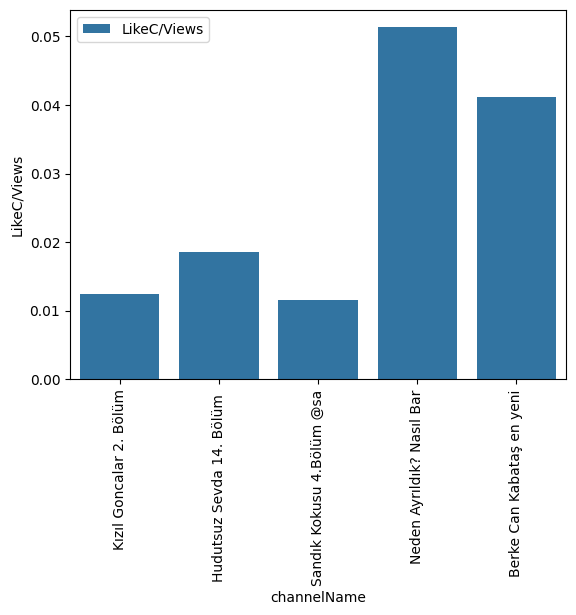

In [345]:
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="LikeC/Views",label="LikeC/Views")
# Rotate x-axis labels
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
plt.show()

#Output : I want to anlyze LikeC/Views ratio. And daily videos are higher than movies.

I will analyze the ;
- higher viewer channel          : Kızıl Goncalar 2.bölüm         Video ID :5nXRi1dkRps
- higher like/view ratio Channel : Neden Ayrıldık?Nasıl Barıstık  Video ID :aWaJSJmsy3c

#### Kızıl Goncalar

CommentThreads by Video_ID

In [346]:
request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="5nXRi1dkRps" # KIzıl Goncalar Video ID
    )
response = request.execute()

print(response)

{'kind': 'youtube#commentThreadListResponse', 'etag': 'nhxXfzHOdS10dMfuBLhFtZ5RZLk', 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNKMGdHQUVTQlFpSklCZ0FFZ1VJaUNBWUFCSUZDSWNnR0FBU0JRaWVJQmdBR0FBaURnb01DSnJEdHF3R0VJQ0JwTm9E', 'pageInfo': {'totalResults': 20, 'resultsPerPage': 20}, 'items': [{'kind': 'youtube#commentThread', 'etag': '3aTgTLx9qy2AANT338idetbA_Jw', 'id': 'UgyoTD-2A4tvycLXkXd4AaABAg', 'snippet': {'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'videoId': '5nXRi1dkRps', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'LZh5ee-FTV5dvUtPSG_fJAxM4u4', 'id': 'UgyoTD-2A4tvycLXkXd4AaABAg', 'snippet': {'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'videoId': '5nXRi1dkRps', 'textDisplay': 'Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yorumlarınızı bekliyorum👇👇', 'textOriginal': 'Kızıl Goncalar 2. bölümü nasıl buldunuz?\nYorumlarınızı bekliyorum👇👇', 'authorDisplayName': '@KizilGoncalarDizisi', 'authorProfileImageUrl': 'https://yt3.ggpht.com/fG-6sMkr4zpkFjLO-_Ma790vtdeM8CKff

Json code converter :

- https://www.objgen.com/json/local/rh49EaBVJ
- https://jsonformatter.org/json-editor

Method For Function 

In [386]:
def get_commentThreads(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers-dot-devsite-v2-prod.appspot.com/youtube/v3/docs/commentThreads/list?apix=true#usage you can look detailly.
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
         maxResults=5000,
        videoId="5nXRi1dkRps" # KIzıl Goncalar Video ID
    )
    response = request.execute()

    print(response)


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'textDisplay':item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'authorDisplayName': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'likeCount':item['snippet']['topLevelComment']['snippet']['likeCount']

        }
        all_data.append(data)
    return pd.DataFrame(all_data)



Method for Get Comments

In [363]:
# Get comments for the specified video
comments = []
nextPageToken = None

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="5nXRi1dkRps",
        maxResults=500,  # Adjust as needed
        pageToken=nextPageToken
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    nextPageToken = response.get("nextPageToken")

    if not nextPageToken:
        break

# Print or use the retrieved comments
for comment in comments:
    print(comment)

Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yorumlarınızı bekliyorum👇👇
Hastaya kaynar çorba veren bakıcı....
Gerçekleri bizden dizileri yasaklayarak engelleyemezsiniz RTÜK kapatılsın
Bir dergâh da Ömer Hayyam kitabı olması biraz saçma olmuş demek ki...
Muhteşem bi dizi. Asıl müslümanların izlemesi gereken bir dizi.
👍
Kimlik bulmaya gelip ne yaptılar awşwmdpwl
Ya kadına ceza vermek ne demek yahu Allahım çıldırıyorum
Çok iyi ya, her şey mi kusursuz olur? Mükemmel bir dizi ortaya çıkarmışsınız gerçekten. Tüm ekibin emeğine sağlık tekrar tekrar.
Cüneyd efendinin  maşallahı var 40 yıllık trapistlere taş çıkarır😊
Ammaaaaan nesi ilginc anlamadim...seytanla melegin kavgasi iste..türkiyenin günlük hali..bosuna para harcamayin
Bazılarının gercek yuzunu gostermesi mükemmel teşekkürler
Sonuna kadar destekliyoruz lütfen çekimlere yılmadan devam
Çok güzel dizi
Kimse kimseyi sevmek zorunda değil ama yorum yapılırken edebe dikkat edilmeli neden bukadar düşmansınız ne zararlarını gördünüz bukadar saptı

In [387]:
get_commentThreads(youtube).sort_values(by="likeCount",ascending=False)


# Chanel ID =  'UCvMf-BavX_3YjG-JPrpPqLw


{'kind': 'youtube#commentThreadListResponse', 'etag': 'Yi6D-G0zIhZWdwdSRab__o00ycE', 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNKMGdHQUVTQlFpSElCZ0FFZ1VJaUNBWUFCSUZDSWtnR0FBU0JRaWVJQmdBR0FBaURRb0xDTHUtdHF3R0VNRHlwQW8=', 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'BSQAZmAltlOYavvxACzaGy_gFjs', 'id': 'UgyoTD-2A4tvycLXkXd4AaABAg', 'snippet': {'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'videoId': '5nXRi1dkRps', 'topLevelComment': {'kind': 'youtube#comment', 'etag': '_IwYGFayeh4-In54WYAegXalUVw', 'id': 'UgyoTD-2A4tvycLXkXd4AaABAg', 'snippet': {'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'videoId': '5nXRi1dkRps', 'textDisplay': 'Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yorumlarınızı bekliyorum👇👇', 'textOriginal': 'Kızıl Goncalar 2. bölümü nasıl buldunuz?\nYorumlarınızı bekliyorum👇👇', 'authorDisplayName': '@KizilGoncalarDizisi', 'authorProfileImageUrl': 'https://yt3.ggpht.com/fG-6sMkr4zpkFjLO-_Ma790vtdeM8CK

,textDisplay,authorDisplayName,likeCount
0,Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yo...,@KizilGoncalarDizisi,2063
61,Doğru yoldasınız <br>Diziye devam❤,@user-pr1nk4ev2n,3
91,Çook uzun zamandır dizi izlemiyordum bu dizi ...,@beyno4651,3
82,Ne soruşturması la dizide hiçbirşey göstermemi...,@dangerouswoman7,2
52,Sadece 👏👏👏 Ayrıca yorumdaki yönlendirmeler yap...,@ozlemavili,2
...,...,...,...
24,3. Bölüm 😢,@ezgisezgin1528,0
23,Bu senaryo bu oyuncular nerede olsa izlenir. O...,@Moymoy10,0
63,Cehalet!,@ilqari7131,0
22,Efendi hazretleri her boku bilir..,@catdakiadam5727,0


##### Channel Sections Analysis by Channel ID 

In [388]:
request = youtube.channelSections().list(
        part="snippet,contentDetails",
        channelId="UCvMf-BavX_3YjG-JPrpPqLw"
    )
response = request.execute()

print(response)

{'kind': 'youtube#channelSectionListResponse', 'etag': 'bdVzw0DFfojUms7FWhUPWVhRovY', 'items': [{'kind': 'youtube#channelSection', 'etag': 'QUB8jsFlj4BgecjbPq8mMeuy2is', 'id': 'UCvMf-BavX_3YjG-JPrpPqLw.jNQXAC9IVRw', 'snippet': {'type': 'singleplaylist', 'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'position': 0}, 'contentDetails': {'playlists': ['PLgP_RgprJFegucBkLgTzIRrinOJ1EGSOQ']}}, {'kind': 'youtube#channelSection', 'etag': 'HiA0LX8BISxd_3NuL1XMMnRgRV0', 'id': 'UCvMf-BavX_3YjG-JPrpPqLw.LeAltgu_pbM', 'snippet': {'type': 'singleplaylist', 'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'position': 1}, 'contentDetails': {'playlists': ['PLgP_RgprJFehScu0Brrw-zCIOTMMQ-nj9']}}, {'kind': 'youtube#channelSection', 'etag': 'rkDKxFfE7aHeOm2PG0NhJ0rFKPI', 'id': 'UCvMf-BavX_3YjG-JPrpPqLw.nGzAI5pLbMY', 'snippet': {'type': 'singleplaylist', 'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'position': 2}, 'contentDetails': {'playlists': ['PLgP_RgprJFei_ghhoOxIjqD8w3KvMleSP']}}, {'kind': 'youtube#channelSection', 'e

In [416]:
def get_ChannelSections(youtube):
    all_data = []
    
    request = youtube.channelSections().list(
        part="snippet,contentDetails",
        channelId='UCvMf-BavX_3YjG-JPrpPqLw'
    )
    response = request.execute()


    for item in response["items"]:
        data = {'ID':item["id"],
                'Type': item["snippet"]["type"],
                'playlists': item['contentDetails']['playlists']
        }
        all_data.append(data)
    return pd.DataFrame(all_data)

In [417]:
get_ChannelSections(youtube)

KeyError: 'contentDetails'

#### Neden Ayrıldık? Nasıl Barıştık?

In [382]:
def get_commentThreads(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers-dot-devsite-v2-prod.appspot.com/youtube/v3/docs/commentThreads/list?apix=true#usage you can look detailly.
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
         maxResults=5000,
        videoId="aWaJSJmsy3c" # Nasıl Ayrıldık? Nasıl Barıştık Video ID
    )
    response = request.execute()

    print(response)


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'textDisplay':item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'authorDisplayName': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'likeCount':item['snippet']['topLevelComment']['snippet']['likeCount'],
                'publishedAt':item['snippet']['topLevelComment']['snippet']['publishedAt'],
                'totalReplyCount':item['snippet']['totalReplyCount']
        }
        all_data.append(data)
    return pd.DataFrame(all_data)

In [397]:
get_commentThreads(youtube)

{'kind': 'youtube#commentThreadListResponse', 'etag': 'ZQHrWoyOvj7nzGvBPk-Dg8fylPE', 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpZElCZ0JFZ1VJaUNBWUFCSUZDSWNnR0FBU0JRaWVJQmdBR0FBaURnb01DSWJTdHF3R0VJanMyYXNC', 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'kg00mem7XTRyTA2Zef7iWKVDon4', 'id': 'UgyoTD-2A4tvycLXkXd4AaABAg', 'snippet': {'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'videoId': '5nXRi1dkRps', 'topLevelComment': {'kind': 'youtube#comment', 'etag': 'BeJHdJF657YqOT0SmtrP8D6p4uA', 'id': 'UgyoTD-2A4tvycLXkXd4AaABAg', 'snippet': {'channelId': 'UCvMf-BavX_3YjG-JPrpPqLw', 'videoId': '5nXRi1dkRps', 'textDisplay': 'Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yorumlarınızı bekliyorum👇👇', 'textOriginal': 'Kızıl Goncalar 2. bölümü nasıl buldunuz?\nYorumlarınızı bekliyorum👇👇', 'authorDisplayName': '@KizilGoncalarDizisi', 'authorProfileImageUrl': 'https://yt3.ggpht.com/fG-6sMkr4zpkFjLO-_Ma790vtdeM8CK

,textDisplay,authorDisplayName,likeCount
0,Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yo...,@KizilGoncalarDizisi,2074
1,Yıllardır dizi izlemeyen ben izlemeye başladım...,@ajask123,0
2,Tum emeyi gecen herkese teşekkür,@user-qv8jz4ux2k,0
3,Neden kaldırılıyor kime çomak sokmuş olabilir....,@gulsenulgr546,0
4,Bu Diziyi yapanlara Te$ekkür ederim.,@nazanoguzhan8200,0
...,...,...,...
95,Sonuna kadar destekliyoruz lütfen çekimlere yı...,@simseksimsek2078,0
96,Çok güzel dizi,@umrangezer4638,1
97,Kimse kimseyi sevmek zorunda değil ama yorum y...,@user-jb4yz5zw9e,0
98,Nolursunuz devam etsin dizi hiç bu kadar soluk...,@ozgebade5220,1


In [372]:
# Get comments for the specified video
comments = []
nextPageToken = None

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="aWaJSJmsy3c",
        maxResults=500,  # Adjust as needed
        pageToken=nextPageToken
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    nextPageToken = response.get("nextPageToken")

    if not nextPageToken:
        break

# Print or use the retrieved comments
for comment in comments:
    print(comment)

Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍
Eski ekip toplansın diyenler
Neden barıştık çünkü param bitti
Barışıcaksanız neden küstünüz
Sürekli sarılmaları 🥹🥹🥹🥹🥹🥲🥲🥲🥲😢😢😊😊😊😊😊
betül param bitti demiyor da ...
Bana iş icabı bir araya gelmişler gibi geldi.
İlk görüngünce mutluluktan gözlerin gölmuşdu iyiki barışdınız  sizi seviyorum 🤗🥹🥹🥹
ex&#39;ten next olmaz diye yorumladım
Oh sonunda barıştınız 2milyon kişi bunu bekliyodu
ayyy siz hic ayrilmayin özlemisimm yaa💖
İyiki varsınız
Nazar ciksin yapmislar iste :)
AAAYYYY ASİRİ MUTLU OLDUM BARİSMANİZA BUGUNUM MUKEMMEL GECECEKKKK
Cepteki para bitince tabikide olur
En sevdiğim çift barışdı😍
İyiki barışmıssiniz cok tatlısınız 👍😊
مای سینگل به گور هاا
Video özeti para bitti izlenmeler düştü gündeme gelmem lazım exe dönek
gereksiz kız tripleri
İyi ki
Betül baya bi güzellesmis la
Abla abimle barişmanizi bekliyorduk sonunda
aska inancim geri geldi sayenizde
Çok mutlu oldum barismaniza
evin kirasını ödeyem

In [383]:
get_commentThreads(youtube).sort_values(by="likeCount",ascending=False).head(100)

{'kind': 'youtube#commentThreadListResponse', 'etag': '9n3fF_DvwAAcE8YcDhCstktmOZ4', 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJZ2dHQUFTQlFpZElCZ0JFZ1VJaVNBWUFCSUZDSWNnR0FBU0JRaWVJQmdBR0FBaURnb01DUEN1dHF3R0VORDNnZmtD', 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'fVQ-8-J95ZyWO9XdvhCOasK38ow', 'id': 'Ugwht1mrOPLGxPG--SZ4AaABAg', 'snippet': {'channelId': 'UCd7R-ZnmxqF75FpTQpl09EQ', 'videoId': 'aWaJSJmsy3c', 'topLevelComment': {'kind': 'youtube#comment', 'etag': '7OvBg4Ojjo7i7gvOVOtOph13vfA', 'id': 'Ugwht1mrOPLGxPG--SZ4AaABAg', 'snippet': {'channelId': 'UCd7R-ZnmxqF75FpTQpl09EQ', 'videoId': 'aWaJSJmsy3c', 'textDisplay': 'Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍', 'textOriginal': 'Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍', 'authorDisplayName': '@BetulCakmak5', 'authorProfileImageUrl': 'https://yt3.

,textDisplay,authorDisplayName,likeCount,publishedAt,totalReplyCount
0,Güzel yorumlarınız için çok teşekkür ederiz o ...,@BetulCakmak5,1625,2023-12-27T16:08:00Z,53
89,cok ozur dileyerek soyluyorum ama Betül artik ...,@angeldarknes973,6,2023-12-28T16:00:59Z,0
35,Neden barıştık: Video konusu olsun diye,@RamilShadman,6,2023-12-28T18:02:44Z,1
83,Para bitmiş belli ki,@goktengrininturku8742,5,2023-12-28T16:13:06Z,0
58,parası bitince kızlar,@ranzelimistee,5,2023-12-28T17:08:27Z,0
...,...,...,...,...,...
59,Ne ara 2 sene oldu ya😂,@icekingpm,0,2023-12-28T17:05:51Z,0
61,"<a href=""https://www.youtube.com/watch?v=aWaJS...",@erdiakkas,0,2023-12-28T17:03:08Z,0
62,Olmamasının sebebi bu hep birlikte olmak ne ol...,@Burcudgn,0,2023-12-28T17:02:00Z,0
63,"<a href=""https://www.youtube.com/watch?v=aWaJS...",@aliyenapim9647,0,2023-12-28T17:01:14Z,0
